In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = 'E:/PROGRAMMING/Topmentor Files/Assignments/8-mar/Project - 1&2_ Simple_Reg/Salary_Data.csv'
df = pd.read_csv(file_path)
print (df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [6]:
print("=======Displaying Basic Information========")
print(df.info())
print(df.head())

=======Displaying Basic Information========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


-------------CHART SHOWING VARIABLE DISTRIBUTION-----------


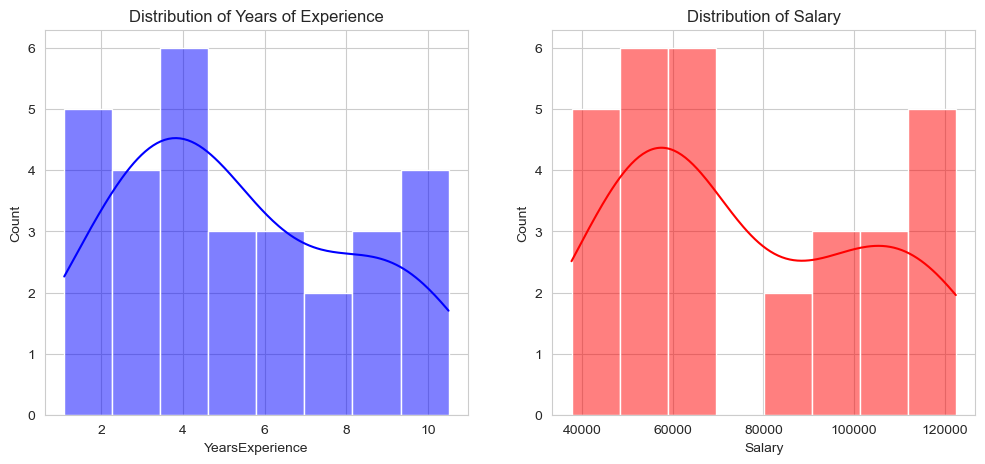

In [10]:
def vardist():
    sns.set_style("whitegrid")
    fig, axes = plt.subplots (1,2, figsize = (12,5))
    sns.histplot (df['YearsExperience'], kde = True, ax = axes[0], bins = 8, color = 'blue')
    axes[0].set_title('Distribution of Years of Experience')
    sns.histplot(df['Salary'], kde = True, ax = axes[1], bins = 8, color = 'red')
    axes[1].set_title('Distribution of Salary')
    plt.show()
print("-------------CHART SHOWING VARIABLE DISTRIBUTION-----------")
vardist()

------CHART SHOWING RELATIONSHIP BETWEEN YEAR OF EXPERIENCE AND SALARY-------


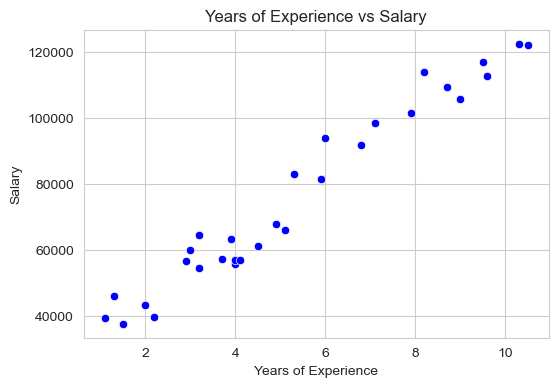

In [12]:
###Relationship between salary and year of experience
def check_relationship():
    plt.figure(figsize = (6,4))
    sns.scatterplot (x = df['YearsExperience'], y = df['Salary'], color = 'blue')
    plt.title("Years of Experience vs Salary")
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()
print("------CHART SHOWING RELATIONSHIP BETWEEN YEAR OF EXPERIENCE AND SALARY-------")
check_relationship()
    

In [7]:
####Correlation Matrix
def corr_matrix():
    correlation = df.corr()
    return correlation
print("-----------CORRELATION MATRIX-----------")
corr_matrix()

-----------CORRELATION MATRIX-----------


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


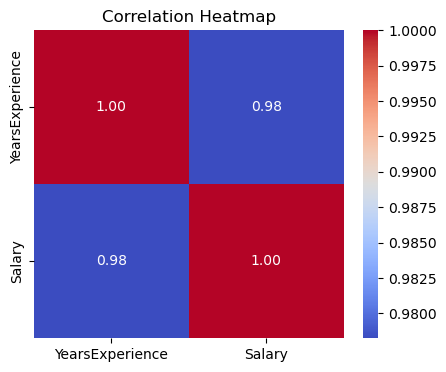

In [9]:
def get_corr_heatmap(correlation):
    plt.figure (figsize = (5,4))
    sns.heatmap(correlation, annot = True, cmap = 'coolwarm',fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
correlation = corr_matrix()
get_corr_heatmap(correlation)    

In [17]:
X = df[['YearsExperience']]
y = df['Salary']
X_log = np.log(X)
y_log = np.log(y)
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size = 0.2, random_state = 42)

def train_evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error (y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2
model_original, mse_original, r2_original = train_evaluate_model(X_train, X_test, y_train, y_test)
model_log, mse_log, r2_log = train_evaluate_model(X_log_train, X_log_test, y_log_train, y_log_test)
print("\nModel Performance:")
print("Original Data - MSE:", mse_original, ", R2 Score:", r2_original)
print("Log-Transformed Data - MSE:", mse_log, ", R2 Score:", r2_log)


Model Performance:
Original Data - MSE: 49830096.85590839 , R2 Score: 0.9024461774180497
Log-Transformed Data - MSE: 0.009181247536977914 , R2 Score: 0.8715418096834777


In [21]:
df["Predicted_Original"] = model_original.predict(X)
df["Predicted_Log"] = np.exp(model_log.predict(X_log))
print("Predicted Original")
df["Predicted_Original"]
print("Predicted log")
df["Predicted_Log"]

Predicted Original
Predicted log


0      32547.456398
1      35692.378129
2      38626.921120
3      45276.650807
4      47723.141626
5      55586.931822
6      56637.237782
7      58691.872064
8      58691.872064
9      63590.409120
10     65465.912810
11     66387.492540
12     66387.492540
13     67298.810148
14     70848.365470
15     74259.171144
16     75917.710824
17     77547.366937
18     82278.014668
19     83045.104569
20     88987.151534
21     91133.845869
22     96667.821424
23     98677.777111
24    101955.919522
25    103882.359900
26    107030.303831
27    107650.909820
28    111916.608329
29    113111.325005
Name: Predicted_Log, dtype: float64

PLOT FOR ORIGINAL MODEL



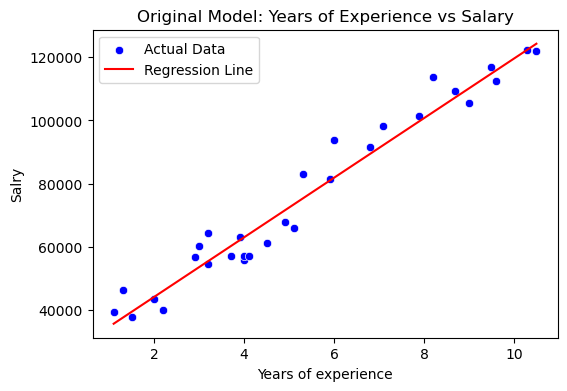

In [27]:
def plot_original():
    plt.figure(figsize = (6,4))
    sns.scatterplot(x = df["YearsExperience"], y = df["Salary"], color = 'blue', label = "Actual Data")
    sns.lineplot(x=df["YearsExperience"], y=df["Predicted_Original"], color='red', label="Regression Line")
    plt.title("Original Model: Years of Experience vs Salary")
    plt.xlabel("Years of experience")
    plt.ylabel("Salry")
    plt.legend()
    plt.show()
print("PLOT FOR ORIGINAL MODEL\n")
plot_original()

PLOT FOR LOG TRANSFORMED MODEL



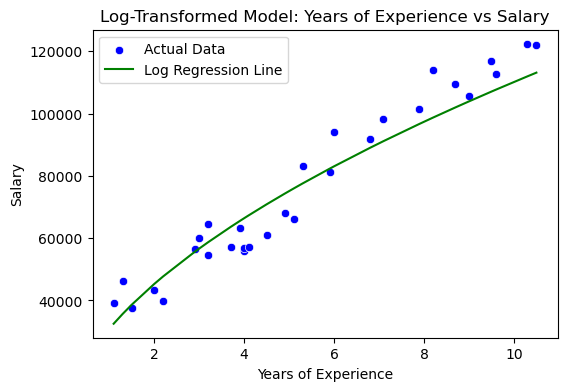

In [29]:
def plot_logtransformed():
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df["YearsExperience"], y=df["Salary"], color='blue', label="Actual Data")
    sns.lineplot(x=df["YearsExperience"], y=df["Predicted_Log"], color='green', label="Log Regression Line")
    plt.title("Log-Transformed Model: Years of Experience vs Salary")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()
print("PLOT FOR LOG TRANSFORMED MODEL\n")
plot_logtransformed()